In [ ]:
import numpy as np
#Функция для создания синусоиды
def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k1,k2,k3,k4,m1,m2,m3,m4,h1,h2,h3,h4,l1,l2,l3,l4,H1,H2,I1,I4,alfa,v,L,A,delta_t=0.002,gamma = 0.5,betta = 0.25):
    v = v*1000/3600
    T = round((l1+l2+L)/v,2)
    T = [round(i,3) for i in np.arange(0,(T+0.001),delta_t)]
    N = len(T)
    t_matrix = list(map(rounding,[(l2-l2)/v,(l2-l4)/v, (l2+l3)/v,(l2+l1)/v]))
    n_it1t = int((L/v)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    #Создаем матрицу коэффициентов упругости
    cos_alfa = np.cos(alfa*np.pi/180)
    K_diag = np.diag(k1,k2,k3,k2,k3,k4)
    D = np.array([[-1,h1,1,0,0,0],
    [-1,h2,0,1,0,0],
    [-1*cos_alfa,(h4-h2)*cos_alfa,0,0,1*cos_alfa,0],
    [-1,-h2,0,0,1,H2],
    [1,-l1,0,0,0,0],
    [1,-l3,0,0,0,0],
    [1,l4,0,0,0,0],
    [1,l2,0,0,0,0]])
    K = np.transpose(D)@K_diag@D
    #Создаем матрицу коэффициентов демпфирования
    C_diag = np.diag(c)
    C = np.array([[0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [1,-l1,0,0,0,0],
    [1,-l3,0,0,0,0],
    [1,l4,0,0,0,0],
    [1,l2,0,0,0,0]])
    C = np.transpose(C)@C_diag@C
    #Создаем диагональную матрицу масс и моментов
    M = np.diag([m1,I1,m2,m3,m4,I4])
    #Делаем матрицу внешних воздействий
    n = D.shape[0]-len(t_matrix)+1
    y_voz = np.zeros((D.shape[0]+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    #Создаем обратную матрицу
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    #Создадим оператор для ввода вектора внешних сил
    K_diag_transpose = np.transpose(D)@K_diag
    #Зададим вектора перемещения скорости и ускорения в 0 момент
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        #Формируем матрицы методом Ньюмарка
        #Ускорений
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        #Скоростей
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        #Перемещений
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt

In [1]:
def lol(e):
    return [i for i in e]

lol([3,4])

[3, 4]

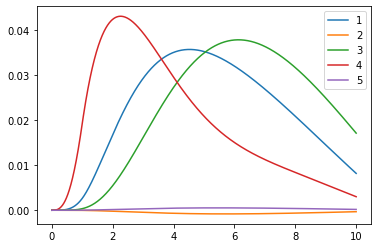

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k1,k2,k3,c1,c2,c3,m1,m2,m3,h1,a1,a2,T,I1,I3,L,A,t,t_voz,delta_t=0.002,gamma = 0.5,betta = 0.25):
    T = [round(i,3) for i in np.arange(0,(T+0.001),delta_t)]
    N = len(T)
    t_matrix = [rounding(t)]
    n_it1t = int((t_voz/L)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    K_diag = np.diag([k1,k2,k3])
    D = np.array([[1,-a1,0,-1,h1],
    [1,a2,-1,0,0],
    [0,0,0,1,0]])
    K = np.transpose(D)@K_diag@D
    C_diag = np.diag([c1,c2,c3])
    C = np.array([[1,-a1,0,-1,h1],
    [1,a2,-1,0,0],
    [0,0,0,1,0]])
    C = np.transpose(C)@C_diag@C
    M = np.diag([m1,I1,m2,m3,I3])
    n = D.shape[0]
    y_voz = np.zeros((n+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    K_diag_transpose = np.transpose(D)@K_diag
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt


X,X_t,X_tt = solve(30,15,40,50,60,50,90,90,90,1,1,1,10,12000,12000,2,0.25,0,2)

num = [i for i in range(1,6)]
for  i in range(len(X)):
    plt.plot([round(i,3) for i in np.arange(0,(10.001),0.002)],X[i], label = f'{num[i]}')
    plt.legend()

import pandas as pd

pd.DataFrame(X)

In [6]:
import pandas as pd

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0.0,1.939767e-13,1.551139e-12,6.395156e-12,1.859341e-11,4.355158e-11,8.820827e-11,1.610295e-10,2.720036e-10,4.326352e-10,...,0.008320,0.008307,0.008295,0.008283,0.008270,0.008258,0.008245,0.008233,0.008221,0.008208
1,0.0,-1.456750e-15,-1.165278e-14,-4.806172e-14,-1.397964e-13,-3.275990e-13,-6.638305e-13,-1.212461e-12,-2.049058e-12,-3.260778e-12,...,-0.000322,-0.000322,-0.000321,-0.000321,-0.000321,-0.000320,-0.000320,-0.000320,-0.000319,-0.000319
2,0.0,1.282932e-16,1.282376e-15,6.536837e-15,2.305831e-14,6.414036e-14,1.512295e-13,3.159425e-13,6.020742e-13,1.067597e-12,...,0.017306,0.017290,0.017274,0.017258,0.017242,0.017226,0.017210,0.017194,0.017178,0.017162
3,0.0,3.493764e-10,2.095479e-09,6.632693e-09,1.535227e-08,2.964234e-08,5.088787e-08,8.047067e-08,1.197694e-07,1.701595e-07,...,0.003065,0.003059,0.003054,0.003048,0.003043,0.003037,0.003032,0.003026,0.003021,0.003015
4,0.0,1.455788e-15,1.164316e-14,4.801270e-14,1.396235e-13,3.271179e-13,6.626962e-13,1.210091e-12,2.044542e-12,3.252771e-12,...,0.000192,0.000192,0.000192,0.000192,0.000191,0.000191,0.000191,0.000191,0.000190,0.000190
